<a href="https://colab.research.google.com/github/OmkarArote/ML-Assignment/blob/main/KNN_AQI_India_2015_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

Importing the dataset

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/city_day.csv')

Dataset Preprocessing

In [ ]:
# Impute missing values with mean value of the respective columns
imputer = SimpleImputer(strategy='mean')
df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']] = imputer.fit_transform(df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']])

# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column and store it in a new 'Year' column
df['Year'] = df['Date'].dt.year

# Print the first 5 rows to check if the 'Year' column was added successfully
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015


In [ ]:
# Get a list of the cities that appear in both years
cities = set(df[df['Year'] == 2015]['City']) & set(df[df['Year'] == 2016]['City'])

In [ ]:
# Filter the dataset to include only the common cities and drop any rows with na values in the AQI_Bucket column
df = df[df['City'].isin(cities) & df['AQI_Bucket'].notna()]

Performing EDA

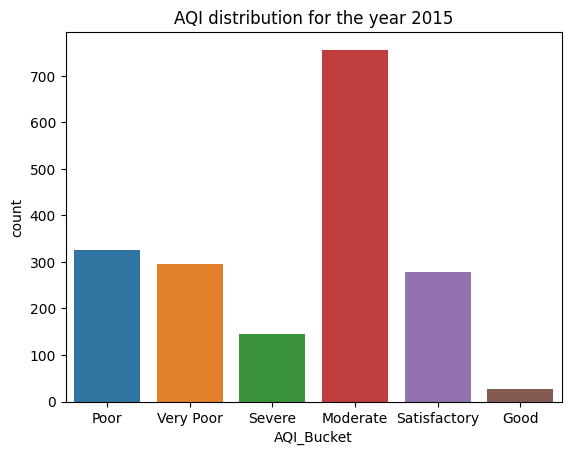

In [ ]:
# Visualize the data for the year 2015
sns.countplot(x='AQI_Bucket', data=df[df['Year'] == 2015])
plt.title('AQI distribution for the year 2015')
plt.show()

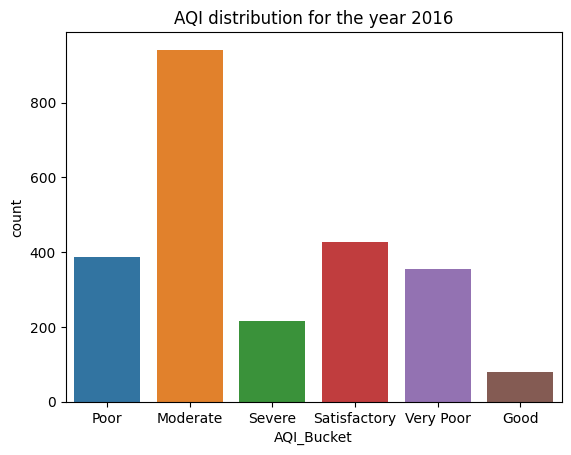

In [ ]:
# Visualize the data for the year 2016
sns.countplot(x='AQI_Bucket', data=df[df['Year'] == 2016])
plt.title('AQI distribution for the year 2016')
plt.show()

Performing KNN

Performance Metric:
              precision    recall  f1-score   support

        Good       0.81      0.60      0.69        83
Satisfactory       0.75      0.77      0.76       978
    Moderate       0.63      0.62      0.63       388
        Poor       0.79      0.82      0.80       834
   Very Poor       0.82      0.77      0.80       266
      Severe       0.74      0.73      0.73       369

    accuracy                           0.75      2918
   macro avg       0.76      0.72      0.73      2918
weighted avg       0.75      0.75      0.75      2918
 



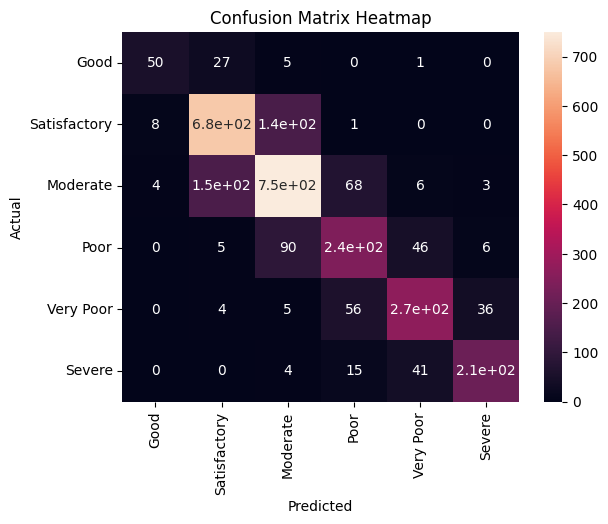

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']], df['AQI_Bucket'], test_size=0.2, random_state=42)

# Fit a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
# print('Confusion Matrix:')
# print(cm, '\n')

print('Performance Metric:')
print(classification_report(y_test, y_pred, target_names=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']), '\n')

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'], yticklabels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()